In [1]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
%pylab inline

import os

#this makes my plots pretty! but it is totally not mandatory to do it
import json


#plus importing scipy.stats
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
PUIDATA = os.getenv("PUIDATA")
print(PUIDATA)

/home/cusp/ep2247/PUIdata


In [3]:
df_gun = pd.read_csv(PUIDATA + "/World firearms murders and ownership - Sheet 1.csv")
df_gun = df_gun[["Country/Territory","Average total all civilian firearms",
                 "Number of homicides by firearm"]]
df_gun.rename(columns={'Country/Territory': 'Country Name'},inplace = True)
df_gun.head()

,Country Name,Average total all civilian firearms,Number of homicides by firearm
0,Albania,270000.0,56.0
1,Algeria,1900000.0,20.0
2,Angola,2800000.0,NaN
3,Anguilla,NaN,1.0
4,Argentina,3950000.0,1198.0


In [4]:
df_ms = pd.read_csv(PUIDATA + "/data-pvLFI.csv")
df_ms.head()

,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Beligium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [5]:
df_pop = pd.read_csv(PUIDATA + "/API_SP.POP.TOTL_DS2_en_csv_v2.csv",skiprows=(0,2))
df_pop = df_pop[["Country Name","2012"]]
df_pop.rename(columns={'2012': 'pop'},inplace = True)
df_pop.head()

,Country Name,pop
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [6]:
df_gdp = pd.read_csv(PUIDATA + "/API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv", skiprows=(0,2))
df_gdp = df_gdp[["Country Name","2012"]]
df_gdp.rename(columns={'2012': 'gdp'},inplace = True)
df_gdp.head()

,Country Name,gdp
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.153984e+11
3,Albania,1.231978e+10
4,Andorra,3.146152e+09


In [7]:
df_ = df_gun.merge(df_ms,right_on="Country", left_on="Country Name")
df_.head()

,Country Name,Average total all civilian firearms,Number of homicides by firearm,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,3050000.0,30.0,Australia,15.0,4
1,Austria,2500000.0,18.0,Austria,30.4,1
2,Canada,9950000.0,173.0,Canada,30.8,4
3,Denmark,650000.0,15.0,Denmark,12.0,0
4,Finland,2400000.0,24.0,Finland,45.3,2


In [8]:
df_merge = df_pop.merge(df_gdp)
df_merge.head()

,Country Name,pop,gdp
0,Aruba,102577.0,NaN
1,Afghanistan,30696958.0,2.053654e+10
2,Angola,25096150.0,1.153984e+11
3,Albania,2900401.0,1.231978e+10
4,Andorra,82431.0,3.146152e+09


In [9]:
df_ = df_.merge(df_merge, right_on="Country Name", left_on="Country Name")
df_.head()

,Country Name,Average total all civilian firearms,Number of homicides by firearm,Country,Guns/100 inhabitants,Number of mass shootings,pop,gdp
0,Australia,3050000.0,30.0,Australia,15.0,4,22728254.0,1.538194e+12
1,Austria,2500000.0,18.0,Austria,30.4,1,8429991.0,4.074516e+11
2,Canada,9950000.0,173.0,Canada,30.8,4,34750545.0,1.824289e+12
3,Denmark,650000.0,15.0,Denmark,12.0,0,5591572.0,3.271489e+11
4,Finland,2400000.0,24.0,Finland,45.3,2,5413971.0,2.567065e+11


# Explotation

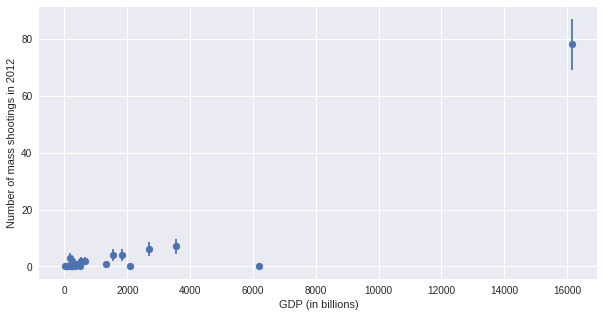

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [10]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shootings in 2012")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

In [11]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] *100000
df_.head()

,Country Name,Average total all civilian firearms,Number of homicides by firearm,Country,Guns/100 inhabitants,Number of mass shootings,pop,gdp,shootingspp
0,Australia,3050000.0,30.0,Australia,15.0,4,22728254.0,1.538194e+12,0.017599
1,Austria,2500000.0,18.0,Austria,30.4,1,8429991.0,4.074516e+11,0.011862
2,Canada,9950000.0,173.0,Canada,30.8,4,34750545.0,1.824289e+12,0.011511
3,Denmark,650000.0,15.0,Denmark,12.0,0,5591572.0,3.271489e+11,0.000000
4,Finland,2400000.0,24.0,Finland,45.3,2,5413971.0,2.567065e+11,0.036941


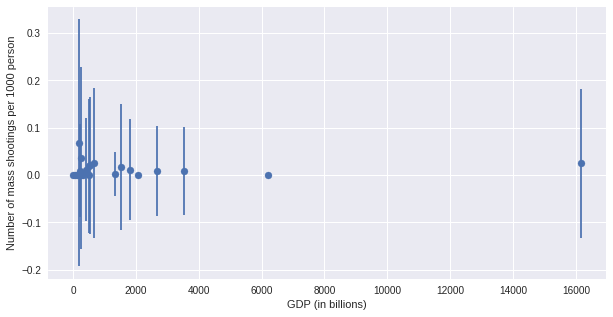

In [12]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['shootingspp'])
ax.errorbar(df_.gdp / 1e9, df_['shootingspp'], 
            yerr = np.sqrt(df_['shootingspp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shootings per 1000 person")
ax.set_ylim()
pl.show()

## In the first plot, the USA is an outiler

## In the second plot, the USA is an outlier

# plot the average number of civilian fire arms per person

## without errors

In [13]:
df_['avgfirepp'] = df_["Average total all civilian firearms"] / df_['pop']
df_.head()

,Country Name,Average total all civilian firearms,Number of homicides by firearm,Country,Guns/100 inhabitants,Number of mass shootings,pop,gdp,shootingspp,avgfirepp
0,Australia,3050000.0,30.0,Australia,15.0,4,22728254.0,1.538194e+12,0.017599,0.134194
1,Austria,2500000.0,18.0,Austria,30.4,1,8429991.0,4.074516e+11,0.011862,0.296560
2,Canada,9950000.0,173.0,Canada,30.8,4,34750545.0,1.824289e+12,0.011511,0.286326
3,Denmark,650000.0,15.0,Denmark,12.0,0,5591572.0,3.271489e+11,0.000000,0.116246
4,Finland,2400000.0,24.0,Finland,45.3,2,5413971.0,2.567065e+11,0.036941,0.443298


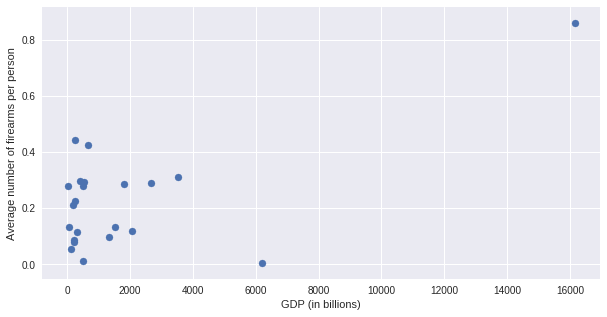

In [14]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['avgfirepp'])
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average number of firearms per person")
ax.set_ylim()
pl.show()

# with errors

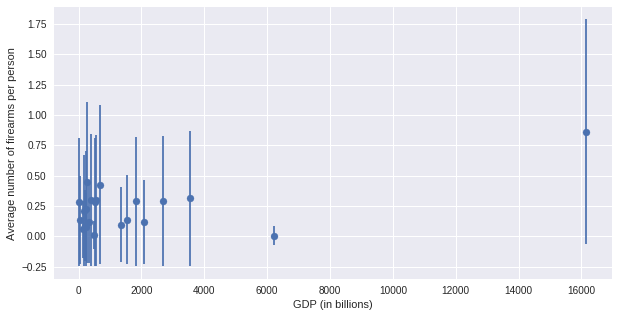

In [15]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['avgfirepp'])
ax.errorbar(df_.gdp / 1e9, df_['avgfirepp'], 
            yerr = np.sqrt(df_['avgfirepp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average number of firearms per person")
ax.set_ylim()
pl.show()

# plot the avg number of homicide by firearms per person

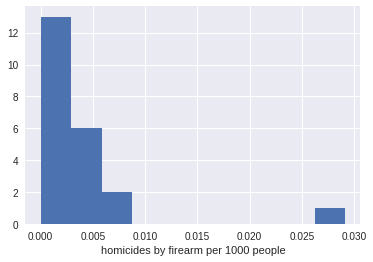

In [16]:

fig, ax = plt.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');

# against country GDP

In [17]:
df_['homipp'] = df_["Number of homicides by firearm"] / df_['pop'] *1000
df_.head()

,Country Name,Average total all civilian firearms,Number of homicides by firearm,Country,Guns/100 inhabitants,Number of mass shootings,pop,gdp,shootingspp,avgfirepp,homipp
0,Australia,3050000.0,30.0,Australia,15.0,4,22728254.0,1.538194e+12,0.017599,0.134194,0.001320
1,Austria,2500000.0,18.0,Austria,30.4,1,8429991.0,4.074516e+11,0.011862,0.296560,0.002135
2,Canada,9950000.0,173.0,Canada,30.8,4,34750545.0,1.824289e+12,0.011511,0.286326,0.004978
3,Denmark,650000.0,15.0,Denmark,12.0,0,5591572.0,3.271489e+11,0.000000,0.116246,0.002683
4,Finland,2400000.0,24.0,Finland,45.3,2,5413971.0,2.567065e+11,0.036941,0.443298,0.004433


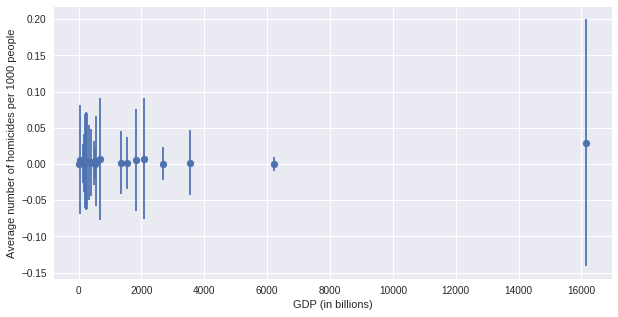

In [18]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['homipp'])
ax.errorbar(df_.gdp / 1e9, df_['homipp'], 
            yerr = np.sqrt(df_['homipp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average number of homicides per 1000 people")
ax.set_ylim()
pl.show()

### The US is an outlier

## plot the number of homicides by fire arm against the number of civilian firearms. plot the US in a different color

# without errors

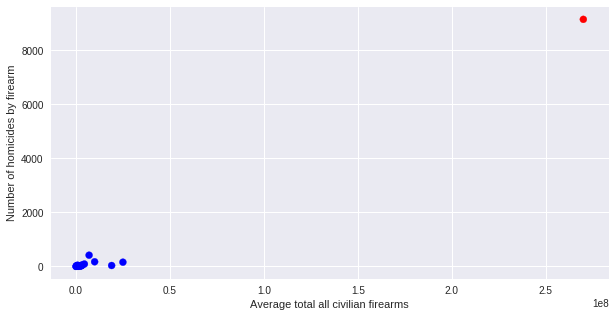

In [19]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_["Average total all civilian firearms"], 
                     df_['Number of homicides by firearm'],
                     color = (df_['Country Name'] == 'United States').map({0:'b',1:'r'}))
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
pl.show()

# with errors

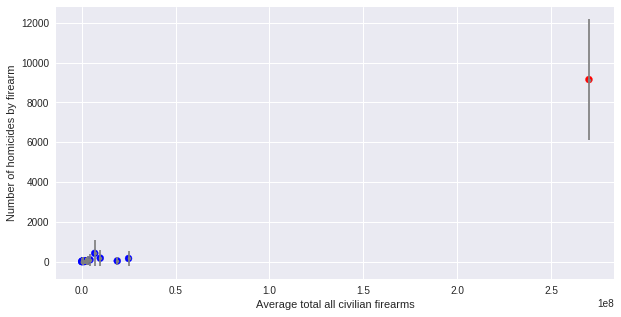

In [20]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(
    df_["Average total all civilian firearms"], 
    df_['Number of homicides by firearm'],
    color = (df_['Country Name'] == 'United States').map({0:'b',1:'r'}))
ax.errorbar(df_["Average total all civilian firearms"], df_['Number of homicides by firearm'], 
            yerr = np.sqrt(df_['Number of homicides by firearm'] * 1000), fmt = '.', color='grey')
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
pl.show()

## plot the number of mass shootings against the number of civilian firearms.

### Without errorbars

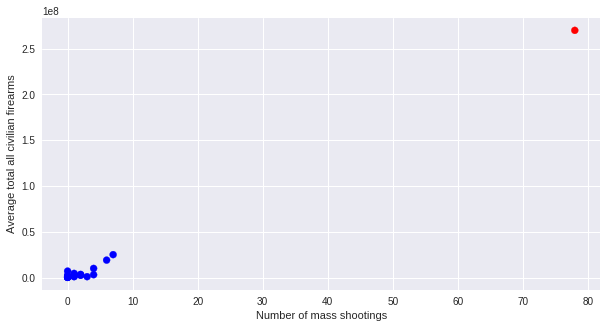

In [21]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_["Number of mass shootings"], 
                     df_['Average total all civilian firearms'],
                     color = (df_['Country Name'] == 'United States').map({0:'b',1:'r'}))
ax.set_ylabel("Average total all civilian firearms")
ax.set_xlabel("Number of mass shootings")
ax.set_ylim()
pl.show()

### with errorbars

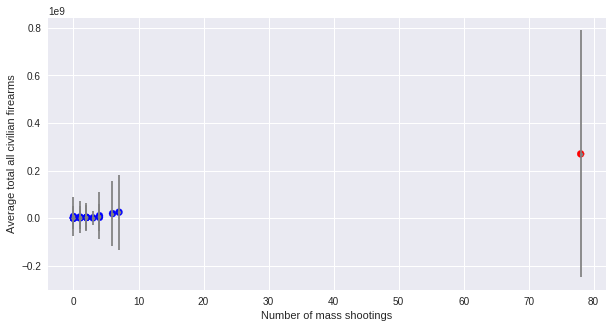

In [22]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(
    df_["Number of mass shootings"], 
    df_['Average total all civilian firearms'],
    color = (df_['Country Name'] == 'United States').map({0:'b',1:'r'}))
ax.errorbar(df_["Number of mass shootings"], df_['Average total all civilian firearms'], 
            yerr = np.sqrt(df_['Average total all civilian firearms'] * 1e9), fmt = '.', color='grey')
ax.set_ylabel("Average total all civilian firearms")
ax.set_xlabel("Number of mass shootings")
ax.set_ylim()
pl.show()

# Modeling

## fit a line to the Number of mass shootings per person as a function of Average total all civilian firearms per person.

### Make plot of just scatters

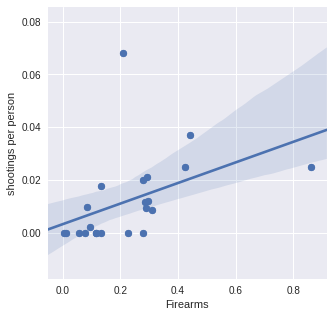

In [30]:
fig = pl.figure(figsize=(5,5)) 


ax = fig.add_subplot(111)

scatter = ax.scatter(df_["avgfirepp"], 
                     df_['shootingspp'],
                     )
sns.regplot(x=df_["avgfirepp"], y=df_["shootingspp"], data=df_)
ax.set_xlabel("Firearms")
ax.set_ylabel("shootings per person")
ax.set_ylim()

#sns.regplot(x="x", y="y", data=df_)
pl.show()

In [24]:
df_["x"] = df_['avgfirepp']
df_["y"] = df_['shootingspp']

y = df_["y"]
x = df_["x"]

In [36]:

# from GitHub fedhere - line fit and regression
def myregression(x,y, method=None):
    if method == None or method =='0':
        rm = sm.OLS(y,x)
    elif method == 'W':
        rm = sm.WLS(y,x)
    else:
        print("Problem in the way you called my regression")
        return -1
    
    reg = rm.fit()
    print("linear regressin slope {}".format(reg.summary()))
    return reg

def line(a,b,x):
    return a*x + b

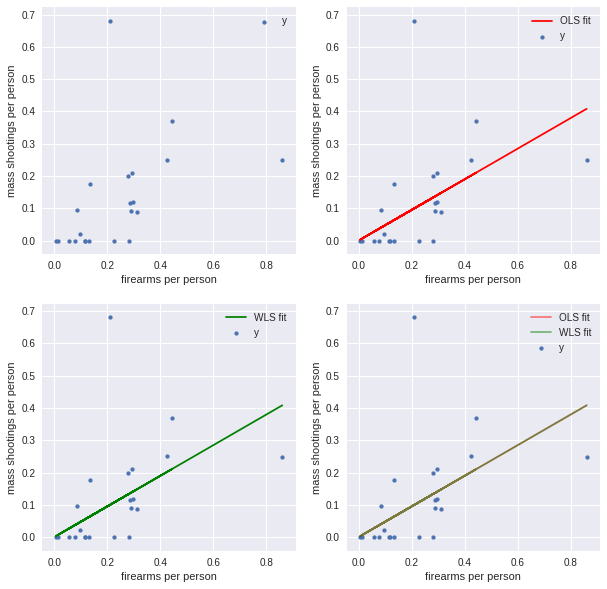

In [50]:
# from GitHub fedhere - line fit and regression

x = df_.x
y = line(10,0,df_.y)

#rnew = myregression(x,y)
#rwnew = myregression(x,y, method='W')

fig = pl.figure(figsize=(10,10))

ax = fig.add_subplot(221)
ax.scatter(x,y, label = "y", s=15)
ax.set_xlabel('firearms per person')
ax.set_ylabel('mass shootings per person')
ax.legend()

ax2 = fig.add_subplot(222)
ax2.scatter(x,y, label = "y", s=15)
ax2.plot(df_.x, rnew.predict(x),'r-',label='OLS fit')
ax2.set_xlabel('firearms per person')
ax2.set_ylabel('mass shootings per person')
ax2.legend()

ax3 = fig.add_subplot(223)
ax3.scatter(x,y, label = "y", s=15)
ax3.plot(x, rwnew.predict(x), label ='WLS fit', color = 'green')
ax3.set_xlabel('firearms per person')
ax3.set_ylabel('mass shootings per person')
ax3.legend()

ax4 = fig.add_subplot(224)
ax4.scatter(x,y, label = "y", s=15)
ax4.plot(df_.x, rnew.predict(),'r-',label='OLS fit', alpha=0.5)
ax4.plot(x, rwnew.predict(x), label ='WLS fit', color = 'green', alpha = 0.5)
ax4.set_xlabel('firearms per person')
ax4.set_ylabel('mass shootings per person')
ax4.legend()

# caption: There is a positive realtionship between mass shootings and number of firearms owned.  With R2 being low, there could be statistically significance between the two variables.

In [56]:

rnew.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     19.31
Date:                Tue, 17 Oct 2017   Prob (F-statistic):           0.000253
Time:                        22:36:10   Log-Likelihood:                 11.220
No. Observations:                  22   AIC:                            -20.44
Df Residuals:                      21   BIC:                            -19.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x              0.4748      0.108      4.394      0.000         0.250     0.700
==============================================================================
Omnibus:                       33.992   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.045
Skew:                           2.646   Prob(JB):                     3.41e-19
Kurtosis:                      11.048   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
rwnew.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.479
Model:                            WLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     19.31
Date:                Tue, 17 Oct 2017   Prob (F-statistic):           0.000253
Time:                        22:36:19   Log-Likelihood:                 11.220
No. Observations:                  22   AIC:                            -20.44
Df Residuals:                      21   BIC:                            -19.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x              0.4748      0.108      4.394      0.000         0.250     0.700
==============================================================================
Omnibus:                       33.992   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.045
Skew:                           2.646   Prob(JB):                     3.41e-19
Kurtosis:                      11.048   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""